In [17]:
import numpy as np
import pandas as pd

n_points = 2000

age = np.round(np.linspace(18,60,n_points),2) #age of employee
np.random.shuffle(age) 

performance = np.linspace(-10,10,n_points) #performance score of employee
np.random.shuffle(performance) 

noise = np.random.randn(n_points) 

g = (100*age) +200*(performance) + 500*age/performance -10000 + 500*noise
y = [1 if y>=0 else 0 for y in g] 

data = pd.DataFrame(data={'age':age,'performance':performance,'y':y})

print(sum(y))
data.head()

457


,age,performance,y
0,24.68,-6.488244,0
1,34.51,8.419210,0
2,23.11,9.509755,0
3,51.47,1.505753,1
4,37.90,5.847924,0


In [18]:
#Add Outliers
import random

for n in range(50):
    num = random.randint(0, n_points)
    if data['y'][num] == 0:
        data['y'][num] = 1
    else:
        data['y'][num] = 0

/Users/conorosully/virtualenv/tensor/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/conorosully/virtualenv/tensor/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


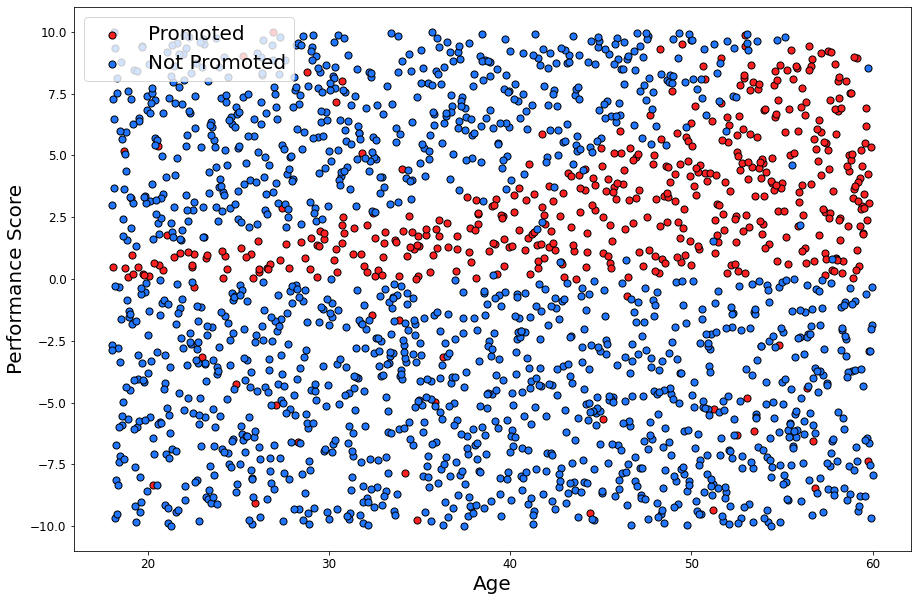

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(nrows=1, ncols=1,figsize=(15,10))

plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.legend(['Promoted','Not Promoted'],loc =2,prop={"size":20})

#plt.savefig('../figures/article_feature_eng/figure1.png',format='png')

In [123]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

x = data[['age','performance']]
x = sm.add_constant(x)
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = RandomForestClassifier(n_estimators=5000,max_depth=2) #fit logistic regression model
model.fit(x_train, y_train)


#train accuracy
predictions = np.around(model.predict(x_train)) 
accuracy = metric.accuracy_score(y_train,predictions)

print(round(accuracy*100,2))

#test accuracy
predictions = np.around(model.predict(x_test)) 
accuracy = metric.accuracy_score(y_test,predictions)

print(round(accuracy*100,2))

/Users/conorosully/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


83.14
93.33


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

x = data[['age','performance']]
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 101)

model = Sequential()
model.add(Dense(2000, input_dim=2, activation='relu'))
model.add(Dense(1500, activation='relu'))
model.add(Dense(1500, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=10) #fit ANN

accuracy = model.evaluate(x_test, y_test)
print(round(accuracy[1]*100,2))

Epoch 1/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.4726 - accuracy: 0.8171
Epoch 2/100
1400/1400 [==============================] - 6s 4ms/step - loss: 0.3139 - accuracy: 0.8857
Epoch 3/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.3003 - accuracy: 0.8971
Epoch 4/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2713 - accuracy: 0.9036
Epoch 5/100
1400/1400 [==============================] - 6s 4ms/step - loss: 0.3150 - accuracy: 0.8971
Epoch 6/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2723 - accuracy: 0.9086
Epoch 7/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2881 - accuracy: 0.8986
Epoch 8/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2639 - accuracy: 0.9143
Epoch 9/100
1400/1400 [==============================] - 5s 4ms/step - loss: 0.2490 - accuracy: 0.9200
Epoch 10/100
1400/1400 [==============================] - 5s 4ms/step - l

1400/1400 [==============================] - 5s 3ms/step - loss: 0.1776 - accuracy: 0.9493
Epoch 80/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1822 - accuracy: 0.9464
Epoch 81/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1897 - accuracy: 0.9464
Epoch 82/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1866 - accuracy: 0.9493
Epoch 83/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1947 - accuracy: 0.9464
Epoch 84/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1805 - accuracy: 0.9479
Epoch 85/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1842 - accuracy: 0.9479
Epoch 86/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.2067 - accuracy: 0.9464
Epoch 87/100
1400/1400 [==============================] - 5s 3ms/step - loss: 0.1941 - accuracy: 0.9507
Epoch 88/100
1400/1400 [==============================] - 5s 3ms/step - loss:

(array([10., 20., 30., 40., 50., 60., 70.]),
 <a list of 7 Text major ticklabel objects>)

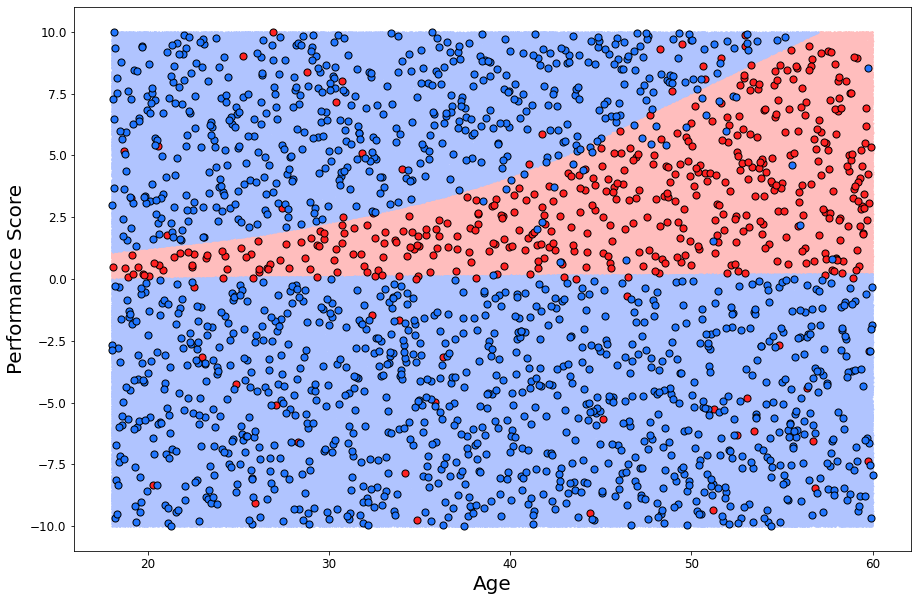

In [21]:
n_points = 1000000 #use many point to visualise decision boundry

age_db = np.linspace(18,60,n_points)
np.random.shuffle(age_db)

performance_db= np.linspace(-10,10,n_points)
np.random.shuffle(performance_db)

data_db = pd.DataFrame({'age':age_db,'performance':performance_db})
#data_db = sm.add_constant(data_db)

#make predictions on the decision boundry points
predictions = model.predict(data_db[['age','performance']])
y_db = np.around(predictions)
data_db['y'] = y_db

fig, ax = plt.subplots( nrows=1, ncols=1,figsize=(15,10))

#Plot decision boundry
plt.scatter('age','performance',c='#ffbdbd',s=1,data=data_db[data_db.y == 1])
plt.scatter('age','performance',c='#b0c4ff',s=1,data=data_db[data_db.y == 0])

#Plot employee data points 
plt.scatter('age','performance',c='#ff2121',s=50,edgecolors='#000000',data=data[data.y == 1])
plt.scatter('age','performance',c='#2176ff',s=50,edgecolors='#000000',data=data[data.y == 0])
plt.ylabel("Performance Score",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)

#plt.savefig('../figures/article_feature_eng/figure2.png',format='png')